# Clase 6: Fundamentos de Numpy


## Objetivos

- Entender por qué y cuándo usar numpy en vez de solo pandas o listas de Python
- Dominar la creación, manipulación y operaciones rápidas sobre arrays
- Realizar transformaciones y análisis prácticos (números e imágenes)


---



## ¿Por qué Numpy? 🤔

1. Velocidad y eficiencia: numpy usa **arrays de bajo nivel** (C/C++), mucho más rápidos que listas de Python para cálculos grandes.
2. Uso en **ciencia de datos y ML**: muchas librerías (scikit-learn, tensorflow, pytorch) usan numpy internamente.
3. Manipulación de datos **multidimensionales**: arrays n-dim (matrices, imágenes, señales...)
4. Diferencia clave: pandas es para tablas y series con etiquetas, numpy es para **cálculo numérico intensivo** y manejo eficiente de arrays.



In [10]:
import numpy as np
import pandas as pd
# Multiplicar por dos 1 millón de números
x_np = np.arange(1_000_000)
x_list = list(range(1_000_000))
%timeit x_np * 2  # numpy
%timeit [i*2 for i in x_list]  # puro python

1.06 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
50.9 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


---
## Creación de arrays y operaciones básicas

In [11]:
np.zeros((3,3))  # Matriz de 3X3 que solo contiene ceros

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [12]:
np.ones((2,4)) # Matriz de 2 filas x 4 columnas que solo contiene unos

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [13]:
np.arange(0, 11, 2) # Vector de números del 0 al 10, con saltos de 2

array([ 0,  2,  4,  6,  8, 10])

In [14]:
np.linspace(0, 1, 10) # Vector que contiene 5 valores entre el valor de inicio 0 y el valor de fin 1

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [15]:
# Construir un arreglo de numpy desde una lista
arr = np.array([[1, 2, 3],[4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
arr.shape # Forma del arreglo

(2, 3)

In [17]:
arr.size # Tamaño del arreglo (Cantidad de elementos que contiene)

6

In [18]:
arr.dtype # Tipo de datos del arreglo

dtype('int64')

---
## Indexación, slicing y broadcasting

In [28]:
A = np.arange(20).reshape(4,5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [20]:
print(f"Elemento fila 3, col 2: {A[3, 2]}\n")   # Elemento fila 3, col 2
print(f"Segunda columna: {A[:, 1]}\n")   # Segunda columna
print(f"Filas 1 y 2: \n{A[1:3, :]}\n")   # Filas 1 y 2

Elemento fila 3, col 2: 17

Segunda columna: [ 1  6 11 16]

Filas 1 y 2: 
[[ 5  6  7  8  9]
 [10 11 12 13 14]]



In [21]:
print(A + 10) #Suma 10 a cada valor del arreglo
print()
print(A * 2) #Multiplica por 2 cada valor del arreglo
print()
A[ A % 2 == 1 ] = 0   # Poner ceros donde hay pares
print(A)

[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]

[[ 0  2  4  6  8]
 [10 12 14 16 18]
 [20 22 24 26 28]
 [30 32 34 36 38]]

[[ 0  0  2  0  4]
 [ 0  6  0  8  0]
 [10  0 12  0 14]
 [ 0 16  0 18  0]]


---
## Operaciones rápidas y filtrado

In [29]:
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [30]:
print(f"Promedio de los valores del arreglo: {np.mean(A)}")
print()
print(f"Mediana de los valores del arreglo: {np.median(A)}")
print()
print(f"Desviación estandar de los valores del arreglo: {np.std(A)}")
print()
print(f"Sumatoria de los valores del arreglo por columna: {np.sum(A, axis=0)}")
print()
print(f"Maximo entre los valores del arreglo por fila: {np.max(A, axis=1)}")

Promedio de los valores del arreglo: 9.5

Mediana de los valores del arreglo: 9.5

Desviación estandar de los valores del arreglo: 5.766281297335398

Sumatoria de los valores del arreglo por columna: [30 34 38 42 46]

Maximo entre los valores del arreglo por fila: [ 4  9 14 19]


In [32]:
# Filtrado booleano
A[A < 15]  # Todos los menores de 15

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

---
## Lectura y manipulación de imágenes con numpy

In [33]:
# Montar drive a colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
from PIL import Image  ## Uso de la libreria Pillow
img = Image.open('/content/drive/MyDrive/Data Science Bit 202505/Clases/Clase 6: Numpy/Gatillo.jpg').convert('RGB')
img_array = np.array(img)
img_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       ...,

       [[163, 163, 161],
        [163, 163, 161],
        [163, 163, 161],
        ...,
        [ 27,  25,  26],
        [ 27,  25,  26],
        [ 27,  25,  26]],

       [[163, 163, 161],
        [163, 163, 161],
        [163, 163, 161],
        ...,
        [ 27,  25,  26],
        [ 27,  25,  26],
        [ 27,  25,  26]],

       [[163, 163, 161],
        [163, 163, 161],
        [163, 163, 161],
        ...,
        [ 27,  25,  26],
        [ 27,  25,  26],
        [ 27,  25,  26]]

In [40]:
img_array.shape  # (alto, ancho, canales)

(3000, 4000, 3)

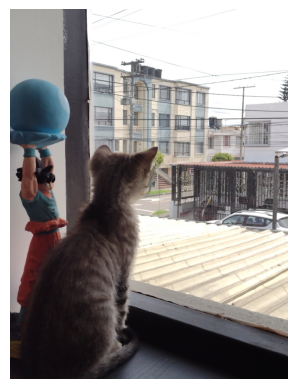

In [41]:
import matplotlib.pyplot as plt
plt.imshow(np.rot90(img_array, 3)) # Rotar la imagen 270 grados a la izquierda y Mostrarla
plt.axis('off')
plt.show()

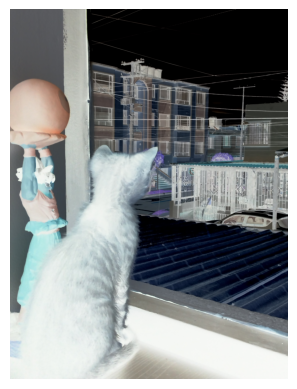

In [36]:
negativo = 255 - img_array
plt.imshow(np.rot90(negativo, 3))
plt.axis('off')
plt.show()

---
## Actividad Entregable

1. Crea un arreglo 5x3 de números aleatorios entre 0 y 100
2. ¿Cuál es la suma total de los valores del arreglo?
3. ¿Cúal es el promedio de cada columna del arreglo?
4. Crea una matriz 10x10 de enteros aleatorios (0-9).
5. Pon en -1 todos los valores > 5
6. Abre una imagen, muestra shape, min, max y promedio de cada canal